In [306]:
#%%python3 --version
%pip install numpy
%pip install pip --upgrade
%pip install statsmodels
%pip install scikit-learn
%pip install scipy
%pip install pandas
%pip install seaborn
%pip install js

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [308]:
#from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#resp = await fetch(URL)
#boston_url = io.BytesIO((await resp.arrayBuffer()).to_py(_df=pd.read_csv(URL)
boston_df=pd.read_csv(URL)

In [309]:
# Describve dataset
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# 1. STATISTIQUES DESCRIPTIVES

## 1.1. Valeur médiane des ologements occupés par leur propriétaire

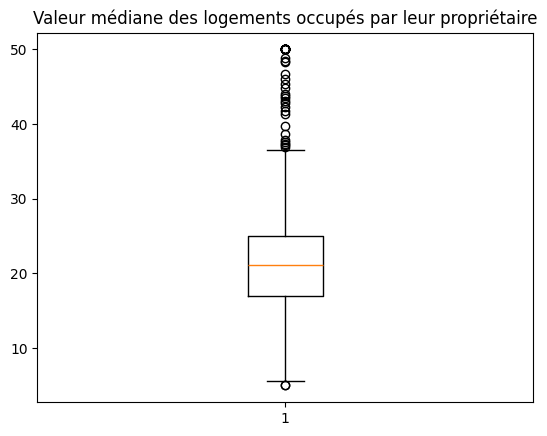

In [310]:
# Valeur médiane des ologements occupés par leur propriétaire
fig, ax = pyplot.subplots()
ax.set_title('Valeur médiane des logements occupés par leur propriétaire')
ax.boxplot(boston_df['MEDV'])

pyplot.show()

1.2. Variable Charles River

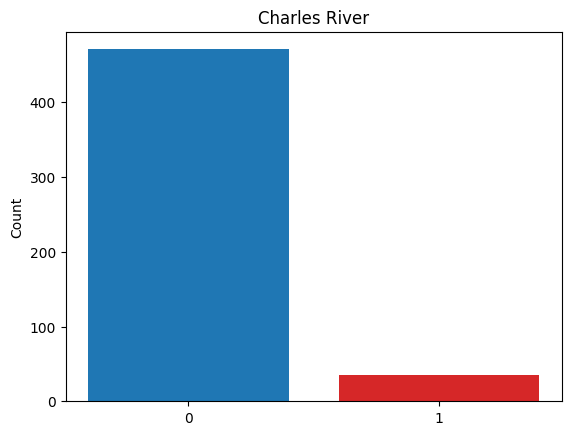

In [311]:
# Charles River variable
fig, ax = pyplot.subplots()
ax.set_title('Charles River')
bar_labels = ['0', '1']
bar_colors = ['tab:blue', 'tab:red']

ax.set_ylabel('Count')
ax.bar(['0','1'], [boston_df[boston_df['CHAS'] == 0]['CHAS'].count(), boston_df[boston_df['CHAS'] == 1]['CHAS'].count()], label=bar_labels, color=bar_colors)

pyplot.show()

## 1.3. MEDV par rapport à l'age

/var/folders/cq/1npmct3976j01xdxk95dr2z00000gn/T/ipykernel_86003/1558301249.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Moins de 35', 'Entre 35 et 70 ans', 'Plus de 70 ans'],


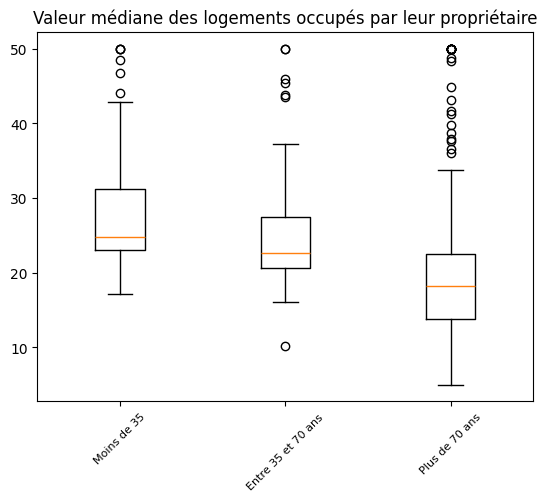

In [312]:
# MEDV par rapport à l'age
# Etape 1 : partitionnement de l'échantillon selon les 3 intervalles d'ages donnés
medv_age_inf_35 = boston_df[boston_df['AGE'] <= 35]['MEDV']
medv_age_35_70 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
medv_age_sup_70 = boston_df[boston_df['AGE'] > 70]['MEDV']

fig, ax = pyplot.subplots()
ax.set_title('Valeur médiane des logements occupés par leur propriétaire')
ax.set_xticklabels(['Moins de 35', 'Entre 35 et 70 ans', 'Plus de 70 ans'],
                    rotation=45, fontsize=8)
ax.boxplot([medv_age_inf_35, medv_age_35_70, medv_age_sup_70])

pyplot.show()

## 1.4. Lien entre Concentration d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville

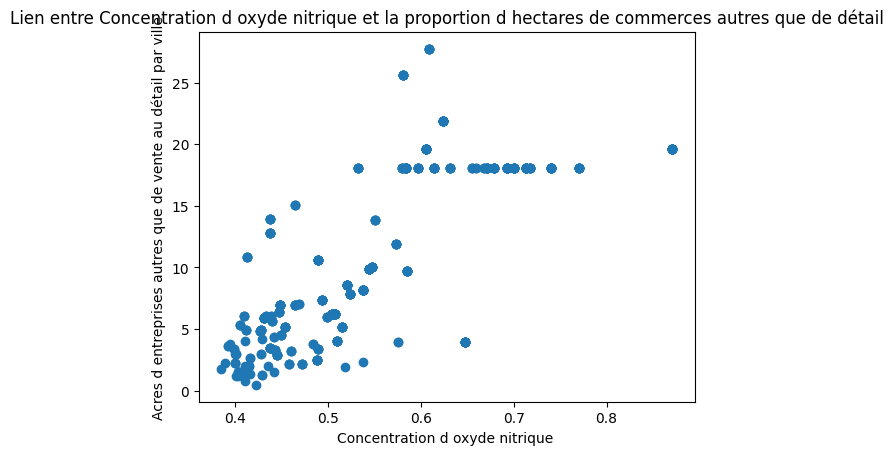

In [313]:
# Lien entre Concentration d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville

fig, ax = pyplot.subplots()
ax.set_xlabel('Concentration d oxyde nitrique ')
ax.set_ylabel('Acres d entreprises autres que de vente au détail par ville')
ax.set_title('Lien entre Concentration d oxyde nitrique et la proportion d hectares de commerces autres que de détail')
ax.scatter(boston_df['NOX'], 
            boston_df['INDUS'])

## 1.5. Histogramme de ratio élèves/enseignants

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

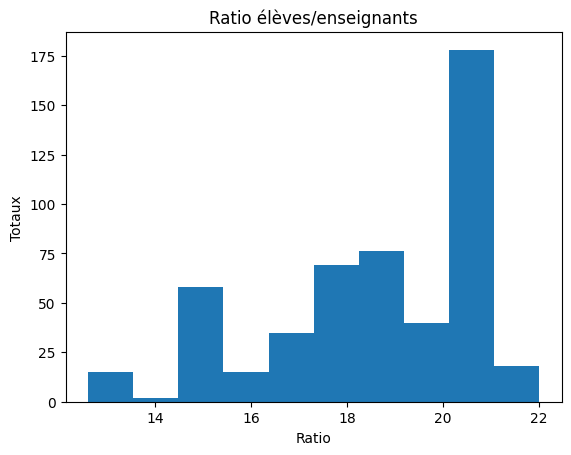

In [314]:
# Histogramme de ratio élèves/enseignants

fig, ax = pyplot.subplots()
ax.set_xlabel('Ratio')
ax.set_ylabel('Totaux')
ax.set_title('Ratio élèves/enseignants')
ax.hist(boston_df['PTRATIO'])

# 2. TESTS STATISTIQUES
## 2.1. TTEST (Test de student)

### H0: Les 2 échantillons ont même moyenne
### H1: Les 2 échantillons sont significativements différents

In [315]:
# TESTS STATISTIQUES
from scipy import stats
# ttest
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
#chas_1.describe()
stats.ttest_ind(chas_0, chas_1)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519902e-05), df=np.float64(504.0))

### La p-value 7.390623170519902e-05 est inférieure à 0.05, l'hypothèse nulle est donc rejetée: Nous concluons que les 2 groupes ont une moyenne significativement différente.

## 2.2. ANOVA

### H0: Les échantillons ont tous même moyenne
### H1: Les échantillons sont statistiquement différents

In [316]:
# ANOVA
from scipy.stats import f_oneway
f_oneway(medv_age_inf_35, medv_age_35_70, medv_age_sup_70)

F_onewayResult(statistic=np.float64(36.40764999196599), pvalue=np.float64(1.7105011022702984e-15))

### La p-value est inférieure  à 0.05.
### Nous rejetons donc l'hypothèse nulle et il existe une différence significative entre les différentes tranches d'âge.

## 2.3. Corrélation de Pearson
### H0: Il n'existe pas de relation entre les concentrations d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville (coefficient proche de 0)
### H1: Il existe une forte relation.

In [317]:
from scipy import stats
res = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
res

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241171e-98))

### La p-value est inférieure à 0.05 donc il existe une relation significative entre concentrations d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville.

## 2.4. Analyse de régression
### 2.4.1. Régression linéaire

In [356]:
# Régression linéaire

from scipy import stats
import pandas as pd
import math

df_sample = (boston_df['DIS'].to_frame()
    .join(
        boston_df['MEDV'].apply(lambda x: math.log(x)).to_frame()
    )
)


df_sample = df_sample.sort_values(by='DIS')
X = df_sample['DIS']
Y = df_sample['MEDV']#.apply(lambda x: math.log(x))

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print('slope:', slope, 'intercept:', intercept, 'r2:', r_value**2, 'p_value:', p_value, 'std_err:', std_err)

slope: 0.024408462062366795 intercept: 1.0077207113726965 r2: 0.13019312428731075 p_value: 5.274887508296215e-17 std_err: 0.0028102343733266465


In [357]:
def predict(x):
   return slope * x + intercept

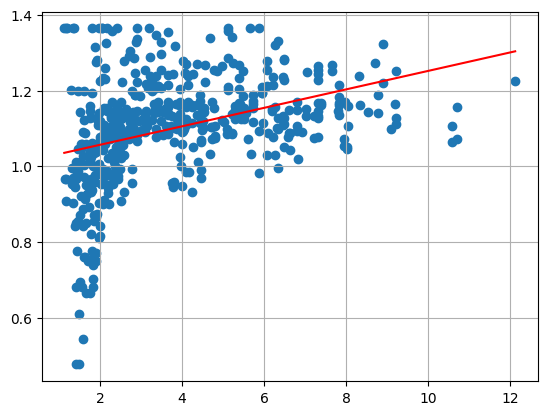

In [358]:
import matplotlib.pyplot as plt

axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraites dans le paragraphe précédent

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

### La régressinon ne semble pas suffisamment pertinente (R carré faible), même après transformation de la variable Y. Essayons une régression polynomiale au vue de l'allure de la courbe.

### 2.4.2. Régression polynomiale

In [359]:
import numpy as np

P=np.polyfit(X, Y, 2)
#P est une liste des valeurs a,b et c du polynome ax**2+bx+c=0
modele=np.poly1d(P)

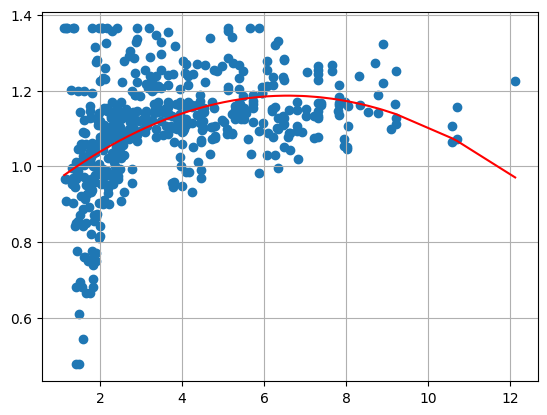

In [360]:
import matplotlib.pyplot as plt

axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraites dans le paragraphe précédent

#fitLine = predict(X)
plt.plot(X, modele(X), c='r')

In [361]:
from sklearn.metrics import r2_score

print('r2 modèle polynomial:', r2_score(Y, modele(X)))

r2 modèle polynomial: 0.20003211814206467


### 2.4.3. Régression exponentielle

In [362]:
from scipy.optimize import curve_fit

In [363]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [364]:
popt, pcov = curve_fit(func, X, Y)
ymodele=func(X, *popt)
R2=r2_score(Y, ymodele)#coeff.de corrélation comparant y et ymodele
print(popt, pcov)

[-0.74162986  0.88768374  1.16851589] [[ 0.03602394 -0.03052469  0.0010774 ]
 [-0.03052469  0.02881644 -0.00133745]
 [ 0.0010774  -0.00133745  0.00012435]]


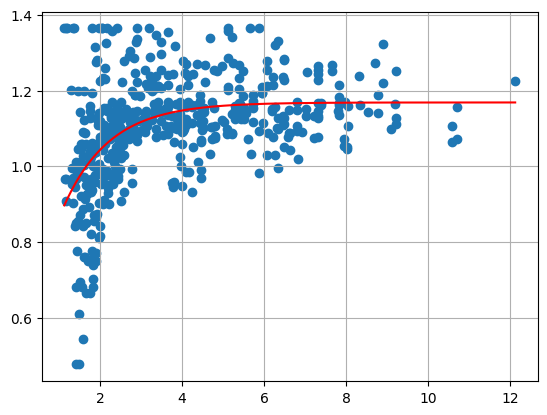

In [365]:
import matplotlib.pyplot as plt

axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraites dans le paragraphe précédent

#fitLine = predict(X)
plt.plot(X, ymodele, c='r')

In [366]:
print('R2:', R2)

R2: 0.22845583682201898


Cette dernière modélisation semble la plus pertinente (R2 maximisé) et semble expliquer partiellement la valeur médiane des maisons occupées par leur propriétaire.